<a href="https://colab.research.google.com/github/jhnsnlim/aseng_api/blob/master/BBCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
#Get the stock quote
df = web.DataReader('BBCA', data_source='yahoo', start='2015-01-01', end='2020-05-29')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-08-09,24.709999,24.709999,24.709999,24.709999,0.0,23.665136
2018-08-10,24.730000,24.730000,24.730000,24.730000,200.0,23.684292
2018-08-13,24.629999,24.480000,24.580000,24.540001,6120300.0,23.502329
2018-08-14,24.870001,24.680000,24.680000,24.870001,18982500.0,23.818373
2018-08-15,24.530001,24.240000,24.400000,24.309999,13419300.0,23.282051
...,...,...,...,...,...,...
2020-05-22,21.209999,20.969999,21.070000,21.180000,199600.0,21.180000
2020-05-26,21.910000,21.709999,21.719999,21.840000,299400.0,21.840000
2020-05-27,22.110001,21.520000,22.049999,22.100000,144100.0,22.100000


In [4]:
#Get the number of rows & columns
df.shape

(454, 6)

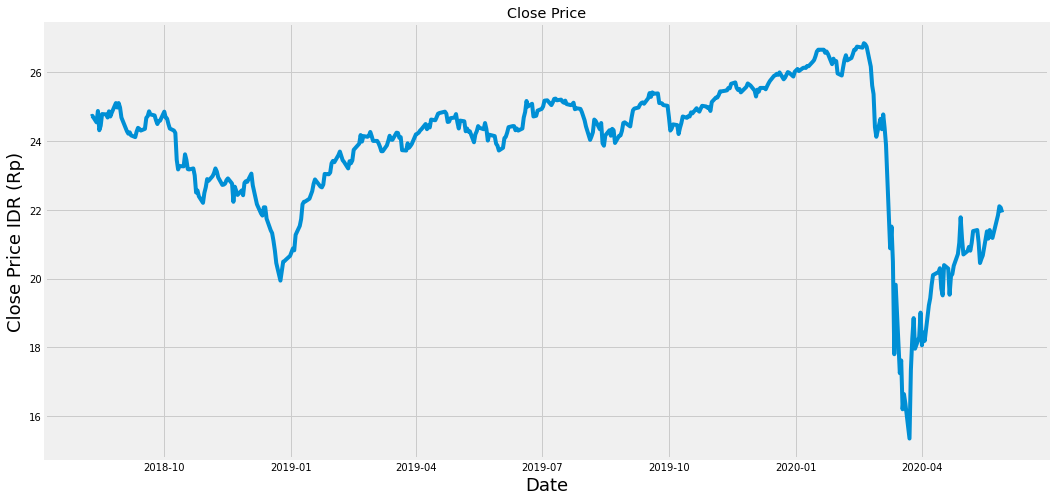

In [5]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR (Rp)', fontsize=18)
plt.show()

In [6]:
#Create new df with only close column
data = df.filter(['Close'])
#Convert to numpy array
dataset = data.values
#Get number of rows to train model
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

364

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.81462131],
       [0.816362  ],
       [0.799826  ],
       [0.82854662],
       [0.77980847],
       [0.79112274],
       [0.82071371],
       [0.81984337],
       [0.81201045],
       [0.82767628],
       [0.81462131],
       [0.82419491],
       [0.84856399],
       [0.83724971],
       [0.84856399],
       [0.83724971],
       [0.81201045],
       [0.77719761],
       [0.77110521],
       [0.77458658],
       [0.76675367],
       [0.76240212],
       [0.77632726],
       [0.78590069],
       [0.78328983],
       [0.77893812],
       [0.78328983],
       [0.81114011],
       [0.81549166],
       [0.82767628],
       [0.81984337],
       [0.81723234],
       [0.80504788],
       [0.79547429],
       [0.8033072 ],
       [0.80417754],
       [0.82680593],
       [0.81201045],
       [0.80939943],
       [0.79547429],
       [0.78416017],
       [0.77893812],
       [0.7728459 ],
       [0.70496088],
       [0.68059181],
       [0.68929506],
       [0.68842472],
       [0.718

In [9]:
#Create training data set & scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split data
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.81462131, 0.816362  , 0.799826  , 0.82854662, 0.77980847,
       0.79112274, 0.82071371, 0.81984337, 0.81201045, 0.82767628,
       0.81462131, 0.82419491, 0.84856399, 0.83724971, 0.84856399,
       0.83724971, 0.81201045, 0.77719761, 0.77110521, 0.77458658,
       0.76675367, 0.76240212, 0.77632726, 0.78590069, 0.78328983,
       0.77893812, 0.78328983, 0.81114011, 0.81549166, 0.82767628,
       0.81984337, 0.81723234, 0.80504788, 0.79547429, 0.8033072 ,
       0.80417754, 0.82680593, 0.81201045, 0.80939943, 0.79547429,
       0.78416017, 0.77893812, 0.7728459 , 0.70496088, 0.68059181,
       0.68929506, 0.68842472, 0.71888602, 0.70496088, 0.68146215,
       0.68059181, 0.68320283, 0.66579632, 0.62228022, 0.62750211,
       0.61270663, 0.59617063, 0.62140988, 0.63533502, 0.65622273])]
[0.6518711854064088]



In [0]:
#Convert x_train & y_train to np array
x_train, y_train = np.array(x_train), np.array(y_train)


In [12]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(304, 60, 1)

In [0]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [0]:
#Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')


In [15]:
#Train the Model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
304/304 [==============================] - 14s 47ms/step - loss: 0.0096


In [0]:
#Create testing data set
test_data = scaled_data[training_data_len - 60:, :]
#Create data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [0]:
#Convert data to np array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [0]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [20]:
#Get the root mean sqaured error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.9885105556911893

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


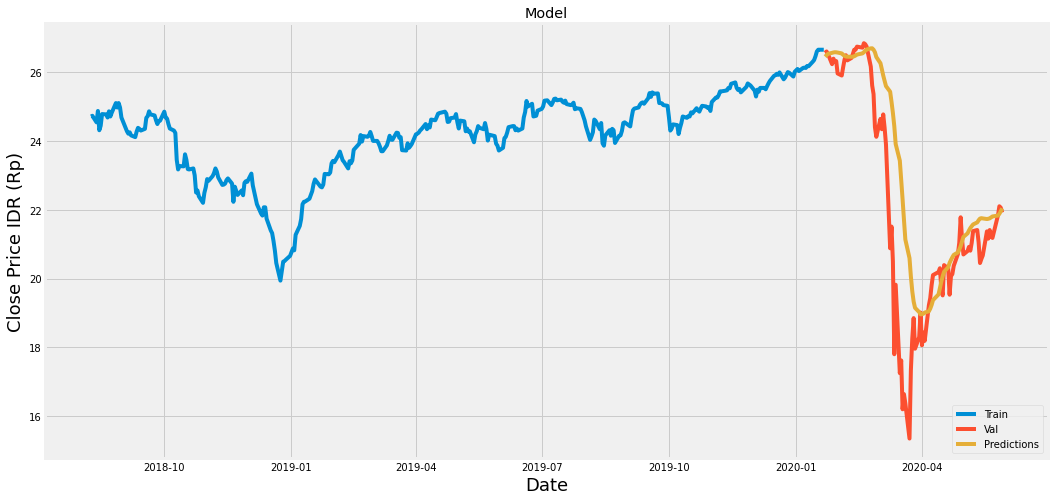

In [21]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR (Rp)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
#Show the valid & predicted prices
valid

,Close,Predictions
Date,,
2020-01-22,26.559999,26.448841
2020-01-23,26.600000,26.490501
2020-01-24,26.530001,26.528835
2020-01-27,26.230000,26.559561
2020-01-28,26.389999,26.570402
...,...,...
2020-05-22,21.180000,21.804428
2020-05-26,21.840000,21.829929
2020-05-27,22.100000,21.880781


In [23]:
#Get the quote
bbca_quote = web.DataReader('BBCA', data_source='yahoo', start='2015-01-01', end='2020-05-28')
#create new df
new_df = bbca_quote.filter(['Close'])
#get the last 60 days closing price & convert df to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 & 1
last_60_days_scaled = scaler.transform(last_60_days)
#create empty list
X_test = []
#Append the last 60 days
X_test.append(last_60_days_scaled)
#convert X_test to np array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[22.041142]]


In [26]:
#Get the quote
bbca_quote2 = web.DataReader('BBCA', data_source='yahoo', start='2020-05-29', end='2020-05-29')
print(bbca_quote2['Close'])

Date
2020-05-29    21.92
2020-05-29    21.92
Name: Close, dtype: float64
